I want to approach this dataset like I am looking to buy a car. 

I prefer small cars, but in this case I really do just want to choose a car with the smallest footprint.

I also want to know if I can predict a car's emissions given relevant features, and predict a sort of classification on the overall emissions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\rripa\Downloads\MY2022 Fuel Consumption Ratings.csv")

In [3]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


Let's first check for missing data.

In [4]:
df.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

Data likely pre-cleaned. Let's see what is categorical and what isnt. This can help with feature engineering down the line, in terms of what features to include and what to not include. Columns with few categories as well as continuous data should be considered for features

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    print('\n')

2022    946
Name: Model Year, dtype: int64




Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: Make, dtype: int64




Silverado 4WD Mud Terrain Tire    5
Sierra 4WD                        5
Silverado 4WD                     5
Sierra 4WD Mud Terrain Tire       5


Features: Cylinders, Transmission ,Fuel Type, Fuel consumption, emissions

Predictors: CO2 Rating, Smog Rating


I should break transmission and fuel type down into something readable

In [6]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [7]:
df['Transmission'] = df['Transmission'].map(lambda x: 'Automated w/ Select Shift' if 'AS' in x else('Automated Manual' if 'AM' in x else('Manual' if 'M' in x else('Continuously Variable' if 'AV' in x else('Automated' if 'A' in x else x)))))


In [8]:
df['Transmission'].value_counts()

Automated w/ Select Shift    366
Automated                    262
Automated Manual             132
Continuously Variable         96
Manual                        90
Name: Transmission, dtype: int64

In [9]:
df.head(2)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,Automated Manual,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,Automated w/ Select Shift,Z,12.6,9.4,11.2,25,263,4,5


Upon clarification, it looks like fuel type can be re-classified for better context

In [10]:
df['Fuel Type'] = df['Fuel Type'].apply(lambda x: 'Premium Gasoline' if 'Z' in x else('Regular Gasoline' if 'X' in x else('Diesel' if 'D' in x else('E85 Flex Fuel' if 'E' in x else x))))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

# Data Visualization & Analysis

<AxesSubplot:xlabel='Fuel Consumption(Comb (L/100 km))', ylabel='CO2 Emissions(g/km)'>

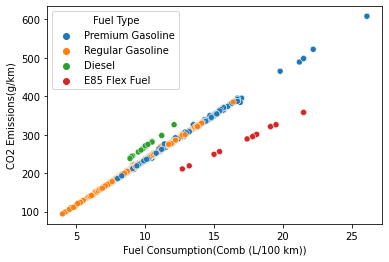

In [12]:
sns.scatterplot(data=df, x = 'Fuel Consumption(Comb (L/100 km))',y='CO2 Emissions(g/km)', hue='Fuel Type')

<AxesSubplot:xlabel='Fuel Consumption(Comb (L/100 km))', ylabel='CO2 Emissions(g/km)'>

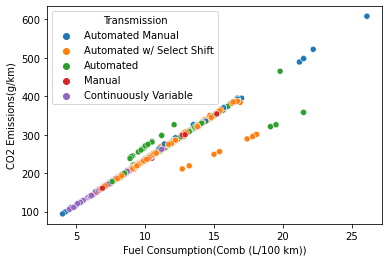

In [13]:
sns.scatterplot(data=df, x = 'Fuel Consumption(Comb (L/100 km))',y='CO2 Emissions(g/km)', hue='Transmission')

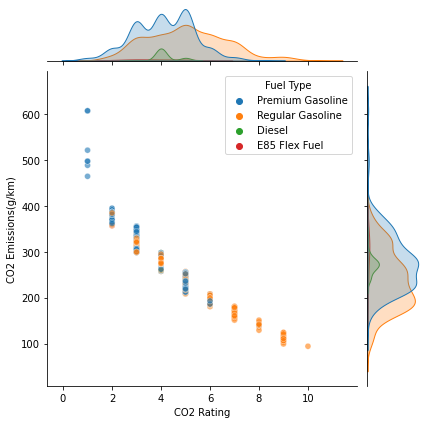

In [14]:
sns.jointplot(data=df, x = 'CO2 Rating',y='CO2 Emissions(g/km)', hue='Fuel Type', alpha = 0.6)

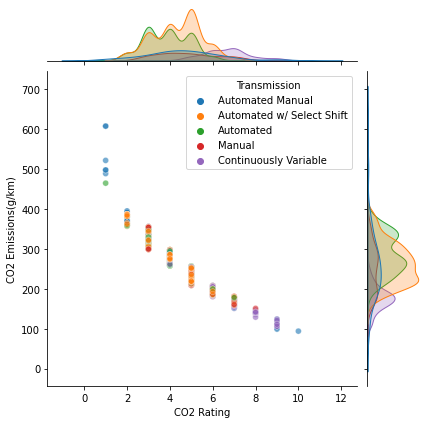

In [15]:
sns.jointplot(data=df, x = 'CO2 Rating',y='CO2 Emissions(g/km)', hue='Transmission', alpha = 0.6)

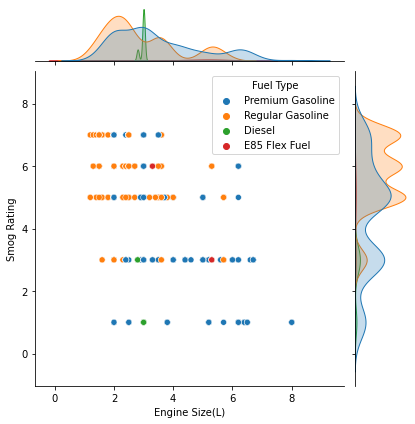

In [16]:
sns.jointplot(kind='scatter',data=df, x ='Engine Size(L)', y='Smog Rating', hue='Fuel Type')

<AxesSubplot:xlabel='Fuel Consumption(Comb (mpg))', ylabel='CO2 Emissions(g/km)'>

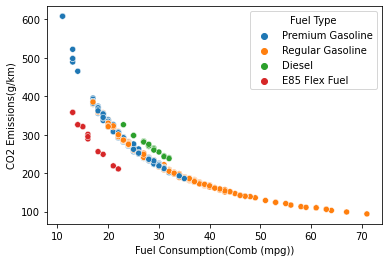

In [17]:
sns.scatterplot(data = df, x='Fuel Consumption(Comb (mpg))', y='CO2 Emissions(g/km)',hue='Fuel Type')

<AxesSubplot:ylabel='Count'>

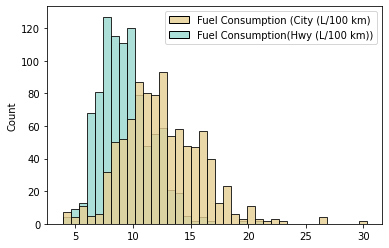

In [18]:
sns.histplot(df[['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))']],alpha=0.8,palette='BrBG')

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Cylinders'>

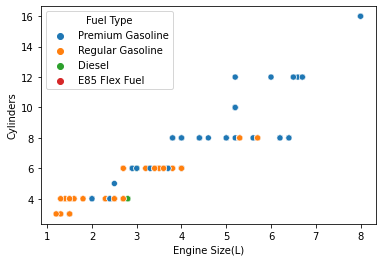

In [19]:
sns.scatterplot(data=df, x='Engine Size(L)', y='Cylinders', hue='Fuel Type')

<AxesSubplot:>

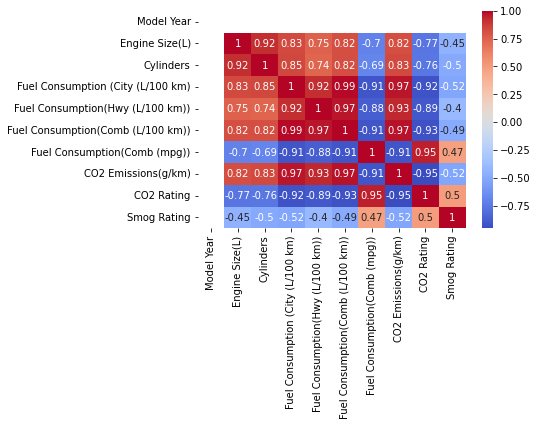

In [20]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

What is the car that likely has the most power for the lowest footprint?

Cylinders and Engine Size likely have a huge role on power. Mpg and CO2 emissions also have a huge effect on a car's footprint

In [21]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,Automated Manual,Premium Gasoline,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,Automated w/ Select Shift,Premium Gasoline,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,Automated w/ Select Shift,Premium Gasoline,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,Automated w/ Select Shift,Premium Gasoline,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,Automated w/ Select Shift,Premium Gasoline,11.2,8.0,9.8,29,230,5,7


In [22]:
df[(df['Fuel Type']=='Regular Gasoline') & (df['CO2 Emissions(g/km)']<150) & (df['CO2 Rating'] >= 9)].sort_values(by='Fuel Consumption(Comb (mpg))', ascending=False).head(5)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
460,2022,Hyundai,IONIQ Blue,Full-size,1.6,4,Automated Manual,Regular Gasoline,4.0,3.9,4.0,71,94,10,7
459,2022,Hyundai,IONIQ,Full-size,1.6,4,Automated Manual,Regular Gasoline,4.3,4.1,4.2,67,99,9,7
458,2022,Hyundai,Elantra Hybrid Blue,Mid-size,1.6,4,Automated Manual,Regular Gasoline,4.5,4.2,4.4,64,103,9,7
885,2022,Toyota,Corolla Hybrid,Compact,1.8,4,Continuously Variable,Regular Gasoline,4.4,4.5,4.5,63,106,9,7
895,2022,Toyota,Prius,Mid-size,1.8,4,Continuously Variable,Regular Gasoline,4.4,4.7,4.5,63,106,9,7


In [23]:
df[(df['Fuel Type']=='Regular Gasoline') & (df['CO2 Emissions(g/km)']<150) & (df['CO2 Rating'] >= 9)].sort_values(by='Engine Size(L)', ascending=False).head(5)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
583,2022,Lexus,ES 300h,Mid-size,2.5,4,Continuously Variable,Regular Gasoline,5.5,5.2,5.3,53,124,9,7
874,2022,Toyota,Camry Hybrid LE,Mid-size,2.5,4,Continuously Variable,Regular Gasoline,4.9,4.8,4.9,58,113,9,7
875,2022,Toyota,Camry Hybrid SE/XLE/XSE,Mid-size,2.5,4,Continuously Variable,Regular Gasoline,5.3,5.0,5.1,55,121,9,7
432,2022,Honda,Accord Hybrid,Full-size,2.0,4,Continuously Variable,Regular Gasoline,5.0,5.0,5.0,56,117,9,7
473,2022,Hyundai,Sonata Hybrid,Full-size,2.0,4,Automated Manual,Regular Gasoline,5.3,4.6,5.0,56,117,9,7


# Predictions - Discrete and Continuous

Can I predict the CO2 rating from a few continuous and categorical dummy variables?

In [24]:
df['Cylinders'] = df['Cylinders'].astype('str')
dummies = pd.get_dummies(df[['Cylinders','Transmission','Fuel Type']])
dummies.head()

,Cylinders_10,Cylinders_12,Cylinders_16,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Transmission_Automated,Transmission_Automated Manual,Transmission_Automated w/ Select Shift,Transmission_Continuously Variable,Transmission_Manual,Fuel Type_Diesel,Fuel Type_E85 Flex Fuel,Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [25]:
X = pd.concat([df[['Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)']],dummies],axis=1)
y = df['CO2 Rating']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In this case I looked at the documentation on scikit-learn for different parameters to tune. 
I have read that CV=10 indicated 10 k-folds which is good for cross validation.
I have also read that RandomizedSearchCV is a good option compared to GridSearchCV, but either should be employed.

In [29]:
rand_co2 = RandomizedSearchCV(RandomForestClassifier(), param_distributions={'n_estimators':[1,10,25,50,100,250,500],
                              'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'bootstrap':[True,False]},
                          cv=10,n_jobs=-1,n_iter=60,scoring='accuracy')
                  

In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [31]:
rand_co2.fit(X_train,y_train)

C:\Users\rripa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [1, 10, 25, 50, 100,
                                                         250, 500]},
                   scoring='accuracy')

In [32]:
pred_co2 = rand_co2.predict(X_test)

In [33]:
rand_co2.best_params_

{'n_estimators': 50,
 'max_features': 'sqrt',
 'criterion': 'entropy',
 'bootstrap': False}

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_co2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        53
           6       1.00      1.00      1.00        18
           7       0.93      1.00      0.97        14
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         1

    accuracy                           0.99       190
   macro avg       0.99      0.94      0.96       190
weighted avg       1.00      0.99      0.99       190



In [35]:
print(confusion_matrix(y_test,pred_co2))

[[ 1  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  1]]


Our model appears to be  rather effective in predicting the CO2 rating of 2022 cars. To make a better model, we'd likely need data from previous years as certain ratings have only one rating.

In [36]:
importances = rand_co2.best_estimator_.feature_importances_
importances

array([1.09949765e-01, 2.56659105e-01, 2.06880421e-01, 3.11387834e-01,
       5.44374516e-04, 4.93222800e-03, 1.07534266e-03, 2.18092459e-03,
       2.45433821e-02, 4.26002435e-06, 1.06409788e-02, 1.91765135e-02,
       3.60627666e-03, 2.89414643e-03, 4.34342437e-03, 1.18455235e-02,
       1.10473810e-03, 9.16166591e-03, 3.39182710e-03, 7.45396039e-03,
       8.22330816e-03])

In [37]:
df_import = pd.DataFrame(zip(X.columns,importances))
df_import.columns = ['Feature','Importance']
df_import = df_import.sort_values(by='Importance',ascending=False)

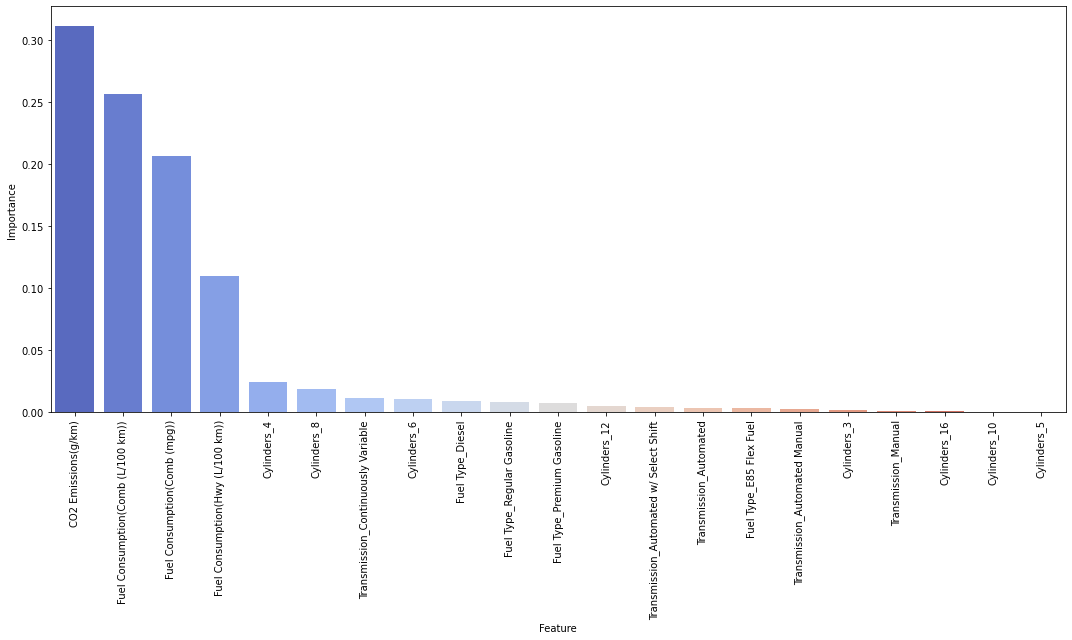

In [38]:
plt.figure(figsize=(15,9))
sns.barplot(data=df_import, x='Feature',y='Importance', palette='coolwarm')
plt.xticks(rotation=90)
plt.tight_layout()

It looks like cylinders and fuel type really don't matter in this case of our model. I'd bet our model can be explained with the 4 continuous variables. 

What about smog rating?

In [39]:
X = pd.concat([df[['Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)']],dummies],axis=1)
y = df['Smog Rating']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scale_smog = StandardScaler()
X_train = scale_smog.fit_transform(X_train)
X_test = scale_smog.transform(X_test)

In [41]:
rand_smog = RandomizedSearchCV(RandomForestClassifier(), param_distributions={'n_estimators':[1,10,25,50,100,250,500],
                              'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'bootstrap':[True,False]},
                          cv=10,n_jobs=-1,n_iter=60,scoring='accuracy')
                  

In [42]:
rand_smog.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [1, 10, 25, 50, 100,
                                                         250, 500]},
                   scoring='accuracy')

In [43]:
pred_smog = rand_smog.predict(X_test)

In [44]:
rand_smog.best_params_

{'n_estimators': 25,
 'max_features': 'log2',
 'criterion': 'entropy',
 'bootstrap': True}

In [45]:
print(classification_report(y_test,pred_smog))

              precision    recall  f1-score   support

           1       0.73      0.73      0.73        11
           3       0.69      0.71      0.70        38
           5       0.73      0.69      0.71        58
           6       0.80      0.73      0.77        45
           7       0.55      0.63      0.59        38

    accuracy                           0.69       190
   macro avg       0.70      0.70      0.70       190
weighted avg       0.70      0.69      0.70       190



In [46]:
print(confusion_matrix(y_test,pred_smog))

[[ 8  3  0  0  0]
 [ 3 27  2  1  5]
 [ 0  6 40  2 10]
 [ 0  1  6 33  5]
 [ 0  2  7  5 24]]


In [47]:
importances = rand_smog.best_estimator_.feature_importances_
importances

array([0.18523781, 0.15702341, 0.13483922, 0.19085202, 0.00471991,
       0.00231561, 0.00043451, 0.00583751, 0.02633057, 0.00029955,
       0.03195367, 0.01586467, 0.05167222, 0.02925328, 0.03820345,
       0.0104973 , 0.0209292 , 0.01399205, 0.00193475, 0.03188263,
       0.04592666])

In [48]:
df_import = pd.DataFrame(zip(X.columns,importances))
df_import.columns = ['Feature','Importance']
df_import = df_import.sort_values(by='Importance',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'CO2 Emissions(g/km)'),
  Text(1, 0, 'Fuel Consumption(Hwy (L/100 km))'),
  Text(2, 0, 'Fuel Consumption(Comb (L/100 km))'),
  Text(3, 0, 'Fuel Consumption(Comb (mpg))'),
  Text(4, 0, 'Transmission_Automated'),
  Text(5, 0, 'Fuel Type_Regular Gasoline'),
  Text(6, 0, 'Transmission_Automated w/ Select Shift'),
  Text(7, 0, 'Cylinders_6'),
  Text(8, 0, 'Fuel Type_Premium Gasoline'),
  Text(9, 0, 'Transmission_Automated Manual'),
  Text(10, 0, 'Cylinders_4'),
  Text(11, 0, 'Transmission_Manual'),
  Text(12, 0, 'Cylinders_8'),
  Text(13, 0, 'Fuel Type_Diesel'),
  Text(14, 0, 'Transmission_Continuously Variable'),
  Text(15, 0, 'Cylinders_3'),
  Text(16, 0, 'Cylinders_10'),
  Text(17, 0, 'Cylinders_12'),
  Text(18, 0, 'Fuel Type_E85 Flex Fuel'),
  Text(19, 0, 'Cylinders_16'),
  Text(20, 0, 'Cylinders_5')])

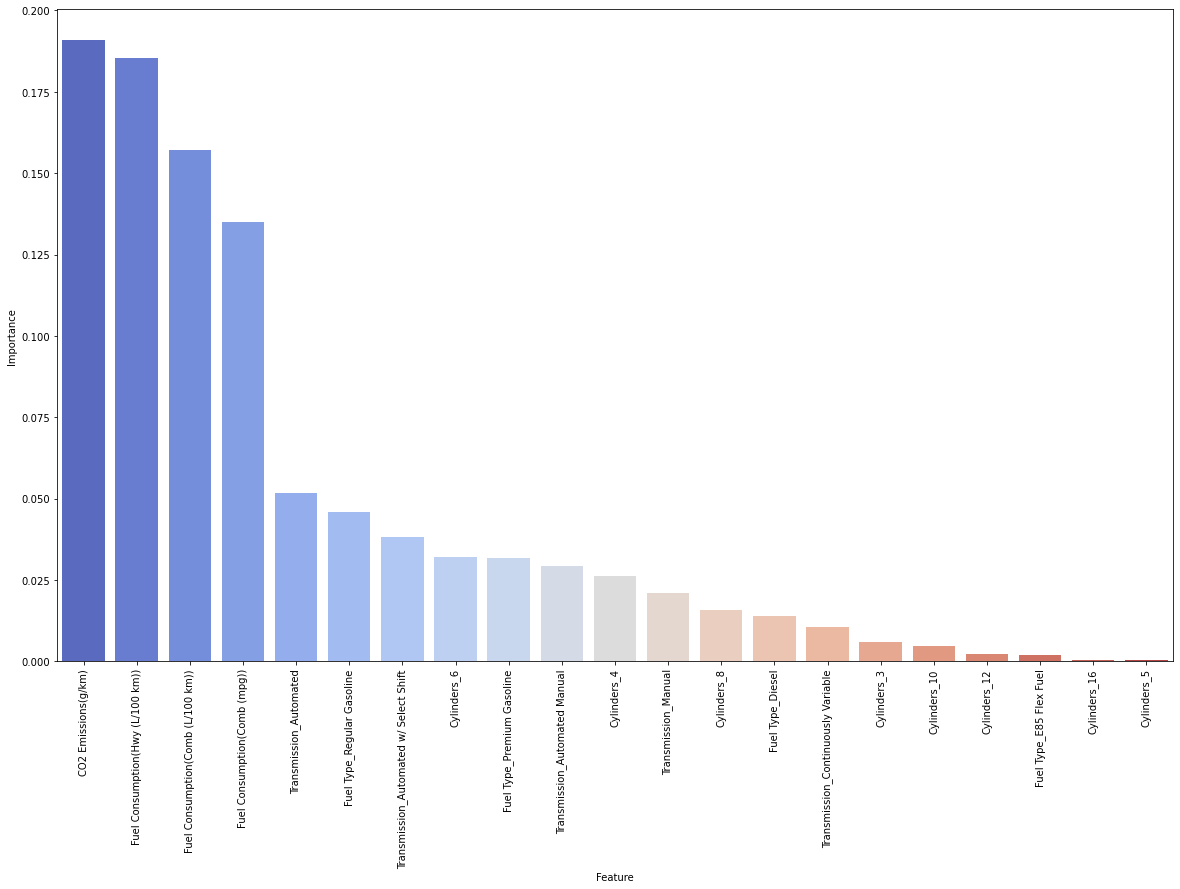

In [49]:
plt.figure(figsize=(20,12))
sns.barplot(data=df_import, x='Feature',y='Importance', palette='coolwarm')
plt.xticks(rotation=90)

Random Forest didn't provide nearly as good of a model compared to the CO2 testing. Perhaps I can try Logistic Regression for a far simpler model?

In [50]:
from sklearn.linear_model import LogisticRegression
lr = RandomizedSearchCV(LogisticRegression(multi_class = 'multinomial',max_iter=1000), 
                        param_distributions = {'penalty':['l1','l2','elasticnet','none'],
                                              'dual':[True,False],
                                              'C':[0.01,0.1,1,5,10,25,50, 100,250, 500, 1000],
                                              'solver':['newton-cg','sag','saga','lbfgs'],
                                              },
                                            
                       cv=10, n_jobs=-1, n_iter = 100, scoring='accuracy')

In [51]:
X = pd.concat([df[['Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)']],dummies],axis=1)
y = df['Smog Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_scale = StandardScaler()
X_train = lr_scale.fit_transform(X_train)
X_test = lr_scale.transform(X_test)

In [52]:
lr.fit(X_train,y_train)

C:\Users\rripa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.58747368 0.63647368        nan        nan        nan
 0.5914386         nan 0.62849123        nan        nan        nan
        nan        nan        nan        nan        nan 0.62849123
        nan        nan 0.63382456 0.62715789        nan        nan
        nan        nan        nan        nan 0.62715789 0.63645614
        nan        nan 0.63382456        nan 0.62715789 0.63382456
 0.63645614        nan        nan        nan        nan        nan
        nan        nan        nan 0.40473684        nan        nan
 0.63382456        nan 0.62715789        nan        nan 0.62715789
 0.58747368        nan        nan 0.62982456 0.62715789        nan
 0.58217544        nan 0.63645614 0.62322807        nan        nan
        nan        nan        nan        nan        nan        nan
 0.63645614        nan        nan        nan        n

RandomizedSearchCV(cv=10,
                   estimator=LogisticRegression(max_iter=1000,
                                                multi_class='multinomial'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 5, 10, 25, 50, 100,
                                              250, 500, 1000],
                                        'dual': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'sag', 'saga',
                                                   'lbfgs']},
                   scoring='accuracy')

In [53]:
pred_lr_smog = lr.predict(X_test)

In [54]:
print(classification_report(y_test,pred_lr_smog))

              precision    recall  f1-score   support

           1       0.78      0.70      0.74        10
           3       0.67      0.49      0.56        41
           5       0.63      0.75      0.69        61
           6       0.59      0.43      0.50        44
           7       0.57      0.76      0.65        34

    accuracy                           0.62       190
   macro avg       0.65      0.63      0.63       190
weighted avg       0.63      0.62      0.61       190



One last time...going to try something more powerful like neural networks.

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scale_smog = StandardScaler()
X_train = scale_smog.fit_transform(X_train)
X_test = scale_smog.transform(X_test)

In [57]:
model = Sequential()
model.add(Dense(21, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(13, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor = 'val_loss',patience =25)
model.fit(x=X_train, y=y_train, validation_data = (X_test,y_test), epochs=600, callbacks=[es])

Epoch 1/600
24/24 [==============================] - 1s 12ms/step - loss: 2.2688 - val_loss: 2.1965
Epoch 2/600
24/24 [==============================] - 0s 4ms/step - loss: 2.1475 - val_loss: 2.0633
Epoch 3/600
24/24 [==============================] - 0s 3ms/step - loss: 1.9930 - val_loss: 1.8739
Epoch 4/600
24/24 [==============================] - 0s 4ms/step - loss: 1.8451 - val_loss: 1.6855
Epoch 5/600
24/24 [==============================] - 0s 4ms/step - loss: 1.7325 - val_loss: 1.5397
Epoch 6/600
24/24 [==============================] - 0s 4ms/step - loss: 1.6092 - val_loss: 1.4424
Epoch 7/600
24/24 [==============================] - 0s 4ms/step - loss: 1.5527 - val_loss: 1.3976
Epoch 8/600
24/24 [==============================] - 0s 5ms/step - loss: 1.4853 - val_loss: 1.3534
Epoch 9/600
24/24 [==============================] - 0s 4ms/step - loss: 1.4963 - val_loss: 1.3288
Epoch 10/600
24/24 [==============================] - 0s 4ms/step - loss: 1.4355 - val_loss: 1.2984
Epoch 11

24/24 [==============================] - 0s 4ms/step - loss: 0.9820 - val_loss: 1.0087
Epoch 84/600
24/24 [==============================] - 0s 5ms/step - loss: 1.0109 - val_loss: 0.9964
Epoch 85/600
24/24 [==============================] - 0s 4ms/step - loss: 1.0019 - val_loss: 1.0012
Epoch 86/600
24/24 [==============================] - 0s 7ms/step - loss: 1.0002 - val_loss: 1.0004
Epoch 87/600
24/24 [==============================] - 0s 5ms/step - loss: 1.0187 - val_loss: 0.9965
Epoch 88/600
24/24 [==============================] - 0s 4ms/step - loss: 0.9817 - val_loss: 1.0003
Epoch 89/600
24/24 [==============================] - 0s 4ms/step - loss: 1.0079 - val_loss: 0.9925
Epoch 90/600
24/24 [==============================] - 0s 5ms/step - loss: 0.9943 - val_loss: 0.9943
Epoch 91/600
24/24 [==============================] - 0s 5ms/step - loss: 0.9977 - val_loss: 0.9949
Epoch 92/600
24/24 [==============================] - 0s 6ms/step - loss: 0.9769 - val_loss: 0.9904
Epoch 93/600


24/24 [==============================] - 0s 3ms/step - loss: 0.9586 - val_loss: 0.9304
Epoch 165/600
24/24 [==============================] - 0s 5ms/step - loss: 0.9303 - val_loss: 0.9235
Epoch 166/600
24/24 [==============================] - 0s 3ms/step - loss: 0.9384 - val_loss: 0.9303
Epoch 167/600
24/24 [==============================] - 0s 3ms/step - loss: 0.9404 - val_loss: 0.9260
Epoch 168/600
24/24 [==============================] - 0s 3ms/step - loss: 0.9097 - val_loss: 0.9256
Epoch 169/600
24/24 [==============================] - 0s 3ms/step - loss: 0.9325 - val_loss: 0.9252
Epoch 170/600
24/24 [==============================] - 0s 3ms/step - loss: 0.9148 - val_loss: 0.9208
Epoch 171/600
24/24 [==============================] - 0s 3ms/step - loss: 0.9217 - val_loss: 0.9290
Epoch 172/600
24/24 [==============================] - 0s 3ms/step - loss: 0.8957 - val_loss: 0.9222
Epoch 173/600
24/24 [==============================] - 0s 3ms/step - loss: 0.9342 - val_loss: 0.9113
Epoc

24/24 [==============================] - 0s 5ms/step - loss: 0.8844 - val_loss: 0.8671
Epoch 246/600
24/24 [==============================] - 0s 4ms/step - loss: 0.8505 - val_loss: 0.8726
Epoch 247/600
24/24 [==============================] - 0s 4ms/step - loss: 0.8942 - val_loss: 0.8711
Epoch 248/600
24/24 [==============================] - 0s 5ms/step - loss: 0.8715 - val_loss: 0.8786
Epoch 249/600
24/24 [==============================] - 0s 4ms/step - loss: 0.8675 - val_loss: 0.8684
Epoch 250/600
24/24 [==============================] - 0s 4ms/step - loss: 0.8857 - val_loss: 0.8787
Epoch 251/600
24/24 [==============================] - 0s 4ms/step - loss: 0.8340 - val_loss: 0.8739
Epoch 252/600
24/24 [==============================] - 0s 5ms/step - loss: 0.8721 - val_loss: 0.8694
Epoch 253/600
24/24 [==============================] - 0s 4ms/step - loss: 0.8755 - val_loss: 0.8744
Epoch 254/600
24/24 [==============================] - 0s 4ms/step - loss: 0.8984 - val_loss: 0.8890
Epoc

<AxesSubplot:>

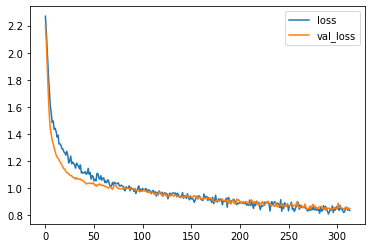

In [58]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [59]:
nn_pred = model.predict(X_test)
preds = []
for i in range(len(nn_pred)):
    preds.append(np.argmax(nn_pred[i]))

In [60]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       1.00      0.40      0.57        15
           3       0.66      0.63      0.64        30
           5       0.65      0.67      0.66        69
           6       0.69      0.47      0.56        38
           7       0.52      0.79      0.62        38

    accuracy                           0.63       190
   macro avg       0.70      0.59      0.61       190
weighted avg       0.66      0.63      0.62       190



A few ML models have been applied to the smog test, and I have not been able to model the CO2 rating well. 

Can I predict CO2 emissions by fuel consumption?

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
X = pd.concat([df[['Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))']],dummies],axis=1)
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scale_lm = MinMaxScaler()
X_train = scale_lm.fit_transform(X_train)
X_test = scale_lm.transform(X_test)


lm = RandomizedSearchCV(LinearRegression(), 
                        param_distributions = {'fit_intercept':[True,False],
                                              'normalize':[True,False],
                                               'positive':[True,False]
                                              },
                                            
                       cv=10, n_jobs=-1, n_iter = 60,)

In [63]:
lm.fit(X_train,y_train)

C:\Users\rripa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=60. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=LinearRegression(), n_iter=60, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'positive': [True, False]})

In [64]:
pred = lm.predict(X_test)

In [65]:
lm_pred = pd.Series(pred)
df_reg = pd.concat([y_test.reset_index(drop=True),lm_pred],axis=1)

In [66]:
df_reg.columns = ['Real Emissions','Predicted Emissions']

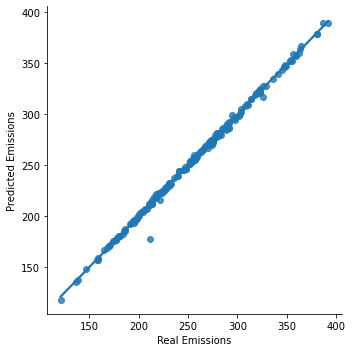

In [67]:
sns.lmplot(data=df_reg,x='Real Emissions',y='Predicted Emissions')

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
mae = mean_absolute_error(lm_pred,y_test)
mae

1.5360197368421054

In [70]:
from sklearn.metrics import explained_variance_score

In [71]:
explained_variance_score(y_test,lm_pred)

0.99723866498343

# Insights

Gasoline cars that do not take premium gas are associatedwith the lowest CO2 emissions and lowest fuel consumptions.
Other fuel types appear to be very "clustered" with respect to fuel consumption and emissions, as well

Premium gasoline-based cars have the worst CO2 emissionsand some of the highest fuel consumption rates, followed by diesel.
Flex fuel cars offer the worst emissions to mpg usage of the fuel types.

This dataset is highly correlated, which isnt surprising. High horsepower vehicles (e.g. bigger engine sizes and larger amounts of cylinders) emit more CO2, and obviously CO2 score is related to CO2 emissions.

In terms of emissions and fuel efficiency, Toyota and Hyundai sedans offer the best footprint. If you want to rather squeeze out a little bit more power, Toyota and Lexus sedans should have more power at the slight cost of fuel efficiency.

Fuel type, transmission, and number of cylinders were identified as potential features. These features were broken down into binary dummy variables, and combined with continuous variables such as fuel efficiency and CO2 emissions.

A multiclassification Random Forest was performed using RandomizedSearchCV to find the best hyperparameters to model the features to the multi-rating CO2 1-10 scale. 

While I wasable to provide an exceptional model for CO2, the smog rating was far more difficult to predict. Employing Random Forests, Logistic Regression, and Neural Networks provided no great model, with RF providing an accuracy of about 74%.

I was able to predict CO2 emissions given the features listed above using a simple linear regression model. With this, I was able to explain approximately 99.7% of the variance with this model